In [1]:
# Import libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
# 1. Load and preprocess MNIST
# ------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # normalize to [-1, 1]
])

mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 60.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.31MB/s]


In [3]:
# 2. Split data (80% train, 20% validation)
# ------------------------------
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

In [4]:
# 3. Convert to numpy arrays
# ------------------------------
def dataset_to_numpy(dataset):
    X = []
    y = []
    for img, label in dataset:
        X.append(img.view(-1).numpy())  # flatten 28x28 → 784
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = dataset_to_numpy(train_dataset)
X_val, y_val = dataset_to_numpy(val_dataset)


In [6]:
# 4. Create binary labels (0 vs not 0)
# ------------------------------
y_train_binary = (y_train == 0).astype(int)
y_val_binary = (y_val == 0).astype(int)

In [7]:
# 5. Train Logistic Regression (binary classification)
# ------------------------------
print("Training binary logistic regression (0 vs not 0)...")

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_binary)

Training binary logistic regression (0 vs not 0)...


LogisticRegression(max_iter=1000)

In [8]:
# 6. Evaluate model
# ------------------------------
y_pred = model.predict(X_val)

acc = accuracy_score(y_val_binary, y_pred)
print(f"\nBinary Classification Accuracy (0 vs not 0): {acc * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_binary, y_pred))

print("\nClassification Report:")
print(classification_report(y_val_binary, y_pred, target_names=["Not 0", "0"]))


Binary Classification Accuracy (0 vs not 0): 99.04%

Confusion Matrix:
[[10725    49]
 [   66  1160]]

Classification Report:
              precision    recall  f1-score   support

       Not 0       0.99      1.00      0.99     10774
           0       0.96      0.95      0.95      1226

    accuracy                           0.99     12000
   macro avg       0.98      0.97      0.97     12000
weighted avg       0.99      0.99      0.99     12000




Showing some predictions...


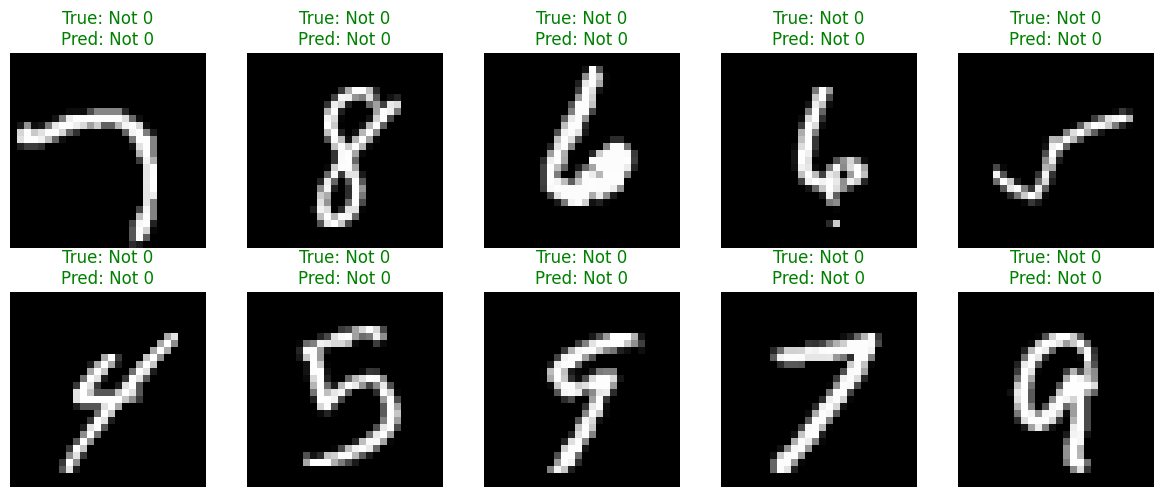

In [10]:
# 7. Visualization of predictions
# ------------------------------
print("\nShowing some predictions...")

# Import necessary libraries for visualization
import random
import matplotlib.pyplot as plt

# Choose 10 random samples from the validation set
indices = random.sample(range(len(X_val)), 10)

plt.figure(figsize=(12, 5))
for i, idx in enumerate(indices):
    img = X_val[idx].reshape(28, 28)  # reshape back to image
    true_label = "0" if y_val_binary[idx] == 1 else "Not 0"
    pred_label = "0" if y_pred[idx] == 1 else "Not 0"
    color = "green" if true_label == pred_label else "red"

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()